In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # ca

Text(0,0.5,'Magnitud')

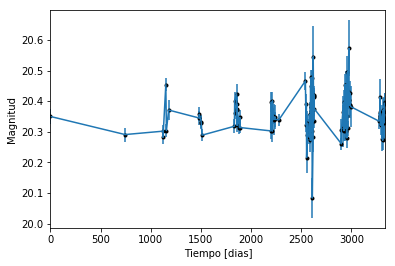

In [2]:
data = np.genfromtxt('LC_G_32769.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

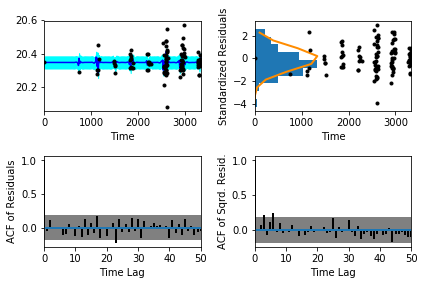

In [6]:
sample.assess_fit()

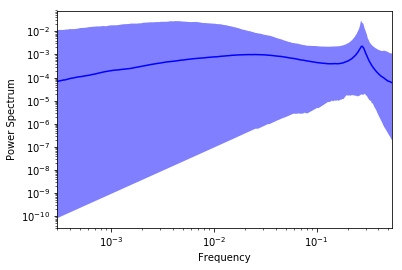

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

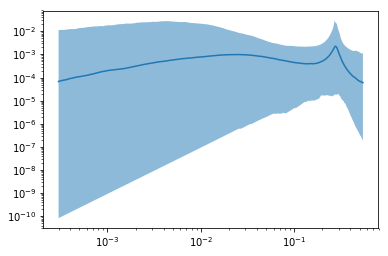

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

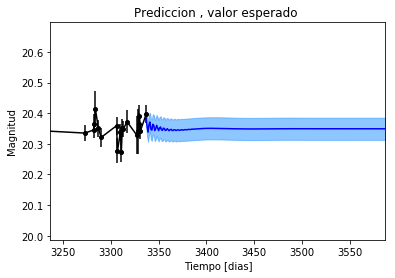

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

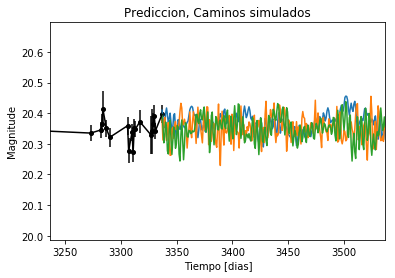

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


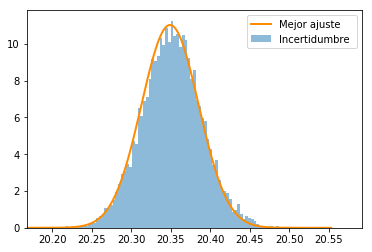

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

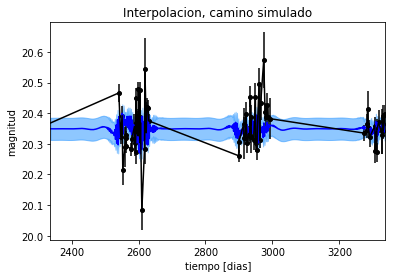

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

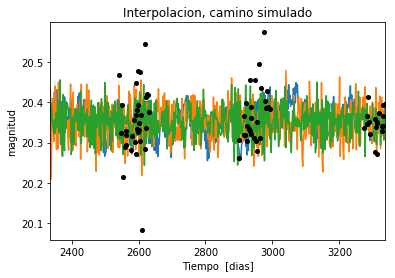

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 3
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [18]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 468.417154839
Median: 0.50001969799
Standard deviation: 0.271698873031
68% credibility interval: [ 0.27542386  0.84671078]
95% credibility interval: [ 0.24192104  1.03265236]
99% credibility interval: [ 0.          1.06985337]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 468.417154839
Median: 0.50001969799
Standard deviation: 0.271698873031
68% credibility interval: [ 0.27542386  0.84671078]
95% credibility interval: [ 0.24192104  1.03265236]
99% credibility interval: [ 0.          1.06985337]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 624.390382284
Median: 0.00246485826402
Standard deviation: 0.167336936673


Plotting parameter summary


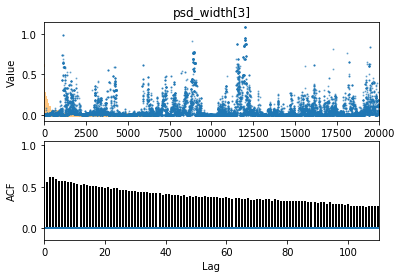

In [19]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [20]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [21]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 904.942474606
Median: 241.69313955
Standard deviation: 2.10448478204
68% credibility interval: [ 239.59864614  243.42605141]
95% credibility interval: [ 236.56571287  245.02793036]
99% credibility interval: [ 234.25881244  245.88175972]


In [22]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [23]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 202.491308359
Median: 1.40914288783
Standard deviation: 3.81249665746
68% credibility interval: [ 0.23361516  6.4363727 ]
95% credibility interval: [  0.08637797  13.80224537]
99% credibility interval: [  0.03790615  18.74567769]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 408.15346749
Median: 18.3229230628
Standard deviation: 27.1549417798
68% credibility interval: [  3.20461441  41.192705  ]
95% credibility interval: [  2.79763593

In [24]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [25]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5204.61439974
Median: 3.67212561826e+16
Standard deviation: 2.13553230146e+71
68% credibility interval: [  5.82576521e-48   2.77911062e+36]
95% credibility interval: [  5.38328494e-68   8.73908168e+68]
99% credibility interval: [  9.04966870e-99   1.38604965e+71]


In [26]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [27]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 665.153385809
Median: 20.3506432329
Standard deviation: 0.00540530129425
68% credibility interval: [ 20.34521302  20.35596926]
95% credibility interval: [ 20.33996127  20.36068151]
99% credibility interval: [ 20.33584016  20.36367466]


In [28]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [29]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 468.417154839
Median: 0.50001969799
Standard deviation: 0.271698873031
68% credibility interval: [ 0.27542386  0.84671078]
95% credibility interval: [ 0.24192104  1.03265236]
99% credibility interval: [ 0.          1.06985337]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 468.417154839
Median: 0.50001969799
Standard deviation: 0.271698873031
68% credibility interval: [ 0.27542386  0.84671078]
95% credibility interval: [ 0.24192104  1.03265236]
99% credibility interval: [ 0.          1.06985337]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 624.390382284
Median: 0.00246485826402
Standard deviation: 0.167336936673


In [30]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [31]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 904.942474606
Median: 241.69313955
Standard deviation: 2.10448478204
68% credibility interval: [ 239.59864614  243.42605141]
95% credibility interval: [ 236.56571287  245.02793036]
99% credibility interval: [ 234.25881244  245.88175972]


In [32]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [33]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 438.065379477
Median: 0.021405979787
Standard deviation: 0.201856924666
68% credibility interval: [ 0.00587315  0.20079317]
95% credibility interval: [ 0.00207354  0.79084898]
99% credibility interval: [  7.06151990e-04   1.03645198e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 107.45885561
Median: 0.021242059057
Standard deviation: 0.195714560122
68% credibility interval: [ 0.00583306  0.19782439]
95% credibility interval: [ 0.00207354  0.77772502]
99% credibility interval: [  7.06151990e-04   1.01559578e+00]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 866.075690234
Median: 0.0624301518098
Standard deviation: 0.28

In [34]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [35]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 650.984998223
Median: 0.00140280370647
Standard deviation: 0.000488735288119
68% credibility interval: [ 0.0009872   0.00190073]
95% credibility interval: [ 0.00062746  0.00253236]
99% credibility interval: [ 0.00041631  0.00305064]


In [36]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1216.94601144
Median: 1.40773642359
Standard deviation: 0.263667915541
68% credibility interval: [ 1.15468706  1.70351833]
95% credibility interval: [ 0.92071361  1.93135476]
99% credibility interval: [ 0.84015859  1.98884425]


In [38]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [39]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 134.181944984
Median: 5.82768081281e-18
Standard deviation: 4.24847718032
68% credibility interval: [  1.99465424e-38   1.18718669e+00]
95% credibility interval: [  3.22379912e-70   7.98423135e+00]
99% credibility interval: [  3.84042019e-72   3.70580275e+01]


In [40]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [41]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 438.065379477
Median: (-0.134497737684-1.79072136849j)
Standard deviation: 2.12671200646
68% credibility interval: [-1.26162073-6.60193802j -0.03690207-1.80916581j]
95% credibility interval: [-4.96905069-3.81773495j -0.01302844-1.71160415j]
99% credibility interval: [ -6.51221984e+00-6.01612355j  -4.43688381e-03-1.70317339j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 107.45885561
Median: (-0.133467793361+4.44771306795j)
Standard deviation: 2.10392407612
68% credibility interval: [-1.24296729+4.72175915j -0.03665018+1.67769431j]
95% credibility interval: [-4.88659045+4.42868458j -0.01302844+1.71160415j]
99% credibility interval: [ -6.38117648e+00+3.22634479j  -4.43688381e-03+1.70317339j]
Posterior summary for param

Plotting 2d PDF w KDE


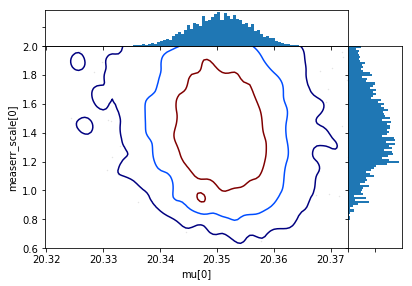

In [42]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


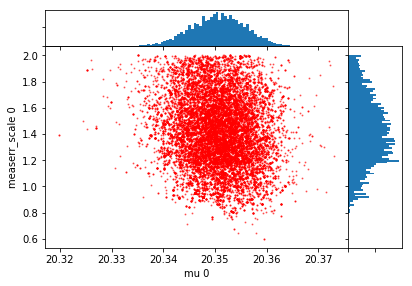

In [43]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


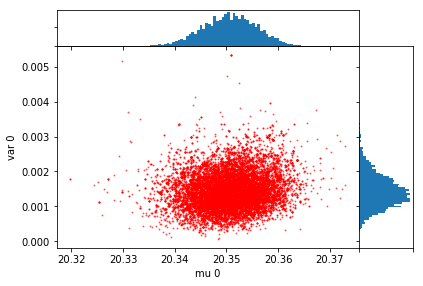

In [44]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


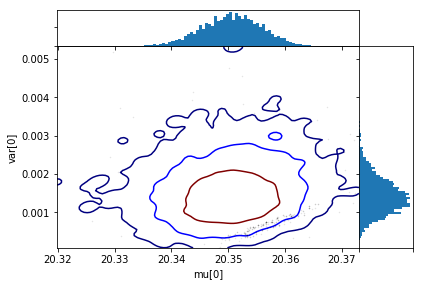

In [45]:
sample.plot_2dkde('mu', 'var', doShow=True)